In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
#Tuples for the suits and ranks. A dictionary matching each rank to its point value.

suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King', 'Ace')
values = {'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 
            'Nine':9, 'Ten':10, 'Jack':11, 'Queen':12, 'King':13, 'Ace':14}

In [4]:
class Card:
    
    def __init__(self,suit,rank):
        self.suit = suit
        self.rank = rank
        self.value = values[rank]
        
    def __str__(self):
        return self.rank + ' of ' + self.suit

In [5]:
class Deck:
    
    def __init__(self):
        self.all_cards = [] 
        for suit in suits: #For every suit...
            for rank in ranks: #...add a card of every rank.
                self.all_cards.append(Card(suit,rank))
                
    def shuffle(self):
        random.shuffle(self.all_cards)
        
    def deal_one(self): #You can comment out the print statement if you don't want to know which card is dealt.
        print(self.all_cards[-1])
        return self.all_cards.pop()
    
    def remaining(self): #In case you need to know how many cards are available.
        return len(self.all_cards)

In [6]:
def check_queen(dealt_card):
    return dealt_card.rank == 'Queen' #Is it a queen? If so, return True.

In [7]:
class Player():
    #The skill attribute is a tuple of two integers that decides 
    #the player's reaction time in arbitrary units.
    #The actual values only matter in relation to other players.
    
    def __init__(self, name, skill, cards_held = []):
        self.name = name
        self.skill = skill
        self.cards_held = cards_held
        
    def add_card(self, new_card):
        self.cards_held = self.cards_held.append(new_card)
        
    def react_to_queen(self):
        return random.randint(self.skill[0], self.skill[1]) #This is the reaction time to seeing a queen.

In [8]:
def BonjourMadame(player1, player2, deck):
    
    #Split the deck between the players.
    cards1 = deck.all_cards[0:26]
    cards2 = deck.all_cards[26:52]
    
    #Haven't started playing yet.
    turn = 0
    cards_placed = [] #So there aren't any cards in the middle.
    
    while len(cards1) > 0 and len(cards2) > 0: #While both players still have cards...
        turn += 1
        if turn % 2 == 0: #player1 puts a card down on even turns.
            new_card = cards1[-1]
            cards1.pop() #We take the final item to be the TOP of the cards held by a player.
            #The reason for this is so that we can conveniently use pop() to remove the top card.
        else:
            new_card = cards2[-1]
            cards2.pop()
        
        #print(new_card) #Troubleshooting print statement to ensure cards are being dealt properly.
        cards_placed.append(new_card) #The new card is added to the cards in the middle.
        
        if check_queen(new_card):
            player1_reaction_time = player1.react_to_queen()
            player2_reaction_time = player2.react_to_queen()
            
            if player1_reaction_time > player2_reaction_time: #If player1 is slower to react...
                cards1 = cards_placed + cards1 #player1 takes the cards from the middle AND PUTS THEM AT THE BOTTOM.
                cards_placed = [] #So no cards are in the middle any more.
            elif player1_reaction_time == player2_reaction_time: #If both players react at the same speed, nothing happens.
                pass
            else: #If player1 is faster, player2 takes the cards.
                cards2 = cards_placed + cards2
                cards_placed = []
            
    if len(cards1) == 0:
        #winner = player1.name
        winner = 0
    else:
        #winner = player2.name
        winner = 1
    
    #print("{} is the winner!".format(winner))
    return (len(cards1), len(cards2), len(cards_placed), turn, winner)

Now, the aim is to see how a difference in skill level affects the turns taken to win.

In [13]:
Nir = Player('Nir',[0,50]) #recently changed the skill to be a list, not a tuple, for mutability
Jade = Player('Jade',[0,100])
results = []
skilldif = []

while (Jade.skill[1] - Jade.skill[0]) > 1:
    #start running the simulations
    mydeck = Deck() 
    mydeck.shuffle()   
    res = BonjourMadame(Nir, Jade, mydeck)
    results.append(res)
    
    Jade.skill[1] -= 1 #Make Jade a bit more skilled.
    skilldif.append((Nir.skill[1] - Jade.skill[1]))

res_arr = np.array(results)
skilldif_arr = np.array(skilldif)
full_arr = np.c_[res_arr, skilldif_arr]
full_arr

array([[  0,  48,   4,  58,   0, -49],
       [  0,  51,   1,  52,   0, -48],
       [  0,  51,   1, 122,   0, -47],
       [  0,  46,   6,  52,   0, -46],
       [  0,  36,  16,  52,   0, -45],
       [  0,  52,   0, 104,   0, -44],
       [  0,  40,  12,  90,   0, -43],
       [  0,  41,  11,  52,   0, -42],
       [  0,  50,   2,  56,   0, -41],
       [  0,  49,   3,  58,   0, -40],
       [  0,  50,   2,  52,   0, -39],
       [ 50,   0,   2,  89,   1, -38],
       [  0,  52,   0, 100,   0, -37],
       [  0,  51,   1,  88,   0, -36],
       [  0,  52,   0,  74,   0, -35],
       [  0,  15,  37,  52,   0, -34],
       [  0,  52,   0,  58,   0, -33],
       [  0,  52,   0, 244,   0, -32],
       [  0,  31,  21,  52,   0, -31],
       [  0,  32,  20,  74,   0, -30],
       [  0,  50,   2,  52,   0, -29],
       [  0,  52,   0,  52,   0, -28],
       [ 50,   0,   2,  51,   1, -27],
       [  0,  48,   4,  58,   0, -26],
       [  0,  48,   4,  92,   0, -25],
       [  0,  40,  12, 13

In [14]:
res_arr_df = pd.DataFrame(data = full_arr)
res_arr_df.columns = ['P1Cards', 'P2Cards', 'MiddleCards', 'Turns', 'Winner', 'SkillDif']
res_arr_df.set_index('SkillDif', inplace = True)
res_arr_df.head()

,P1Cards,P2Cards,MiddleCards,Turns,Winner
SkillDif,,,,,
-49,0,48,4,58,0
-48,0,51,1,52,0
-47,0,51,1,122,0
-46,0,46,6,52,0
-45,0,36,16,52,0


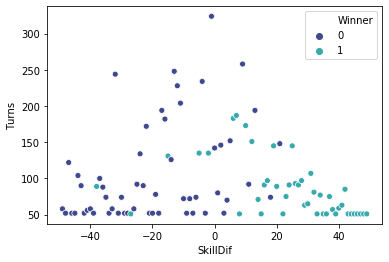

In [20]:
sns.scatterplot(x = res_arr_df.index, y = res_arr_df['Turns'], hue = res_arr_df['Winner'], palette = 'mako')

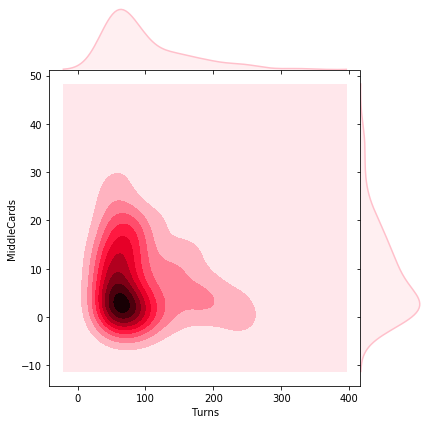

In [23]:
sns.jointplot(data = res_arr_df, x = 'Turns', y = 'MiddleCards',kind = 'kde', color = 'pink', space = 0)